# Understanding the data features

Age : Age of the patient<br>

Sex : Sex of the patient<br>

exang: exercise induced angina (1 = yes; 0 = no)<br>

ca: number of major vessels (0-3)<br>

cp : Chest Pain type chest pain type<br>
Value 1: typical angina<br>
Value 2: atypical angina<br>
Value 3: non-anginal pain<br>
Value 4: asymptomatic<br>

trtbps : resting blood pressure (in mm Hg)<br>

chol : cholestoral in mg/dl fetched via BMI sensor<br>

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>

rest_ecg : resting electrocardiographic results<br>
Value 0: normal<br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>

thalach : maximum heart rate achieved<br>
<br>
target : 0= less chance of heart attack 1= more chance of heart attack

# Importing Module

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
# Import the dataset
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Check any null values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [59]:
# Check the value counts for output
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [60]:
df.groupby('output').mean().transpose()

output,0,1
age,56.601449,52.496970
sex,0.826087,0.563636
cp,0.478261,1.375758
trtbps,134.398551,129.303030
chol,251.086957,242.230303
fbs,0.159420,0.139394
restecg,0.449275,0.593939
thalachh,139.101449,158.466667
exng,0.550725,0.139394
oldpeak,1.585507,0.583030


In [61]:
continuous = ['oldpeak','thalachh','chol','trtbps','age']
discrete = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

<Figure size 720x360 with 0 Axes>

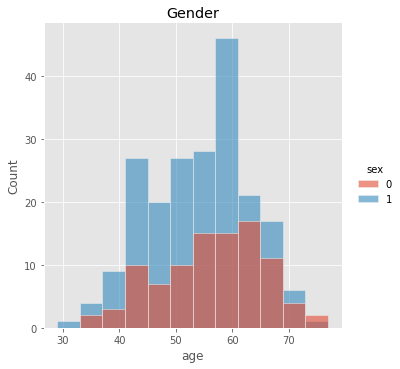

In [62]:
plt.figure(figsize=(10,5))
sns.displot(x='age', hue='sex', data=df, alpha=0.6)
plt.title("Gender")
plt.show()

<Figure size 720x360 with 0 Axes>

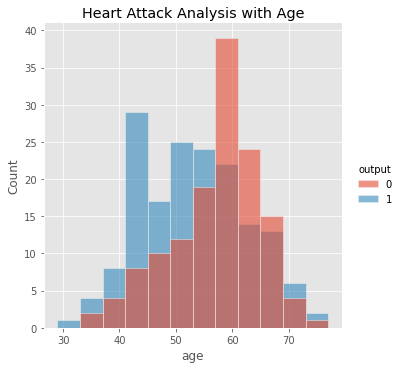

In [63]:
# plot age with heart attack

plt.figure(figsize=(10,5))
sns.displot(x='age', hue='output', data=df, alpha=0.6)
plt.title("Heart Attack Analysis with Age")
plt.show()

<Figure size 720x360 with 0 Axes>

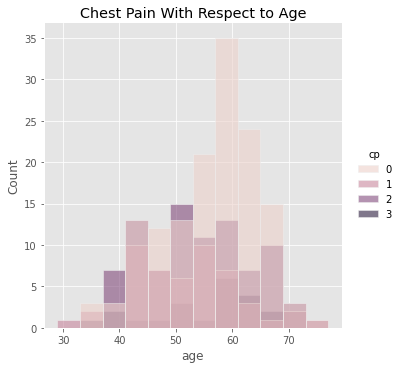

In [64]:
# which age group people has more chest pain

plt.figure(figsize=(10,5))
sns.displot(x='age',hue='cp',data=df,alpha=0.6)
plt.title("Chest Pain With Respect to Age")
plt.show()

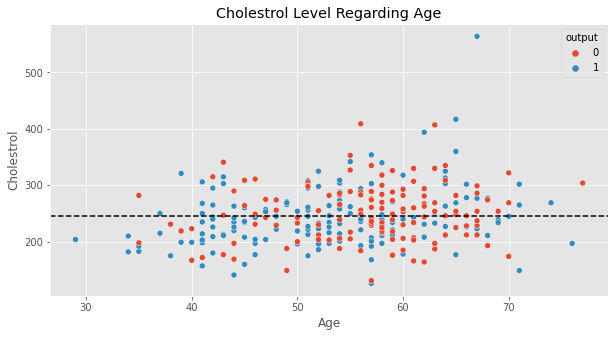

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot( df['age'],df['chol'], hue=df['output'])
plt.xlabel("Age",)
plt.ylabel("Cholestrol")
plt.title("Cholestrol Level Regarding Age")
plt.axhline(df['chol'].mean(), linestyle='--', color='black')
plt.grid(True)
plt.style.use("ggplot")

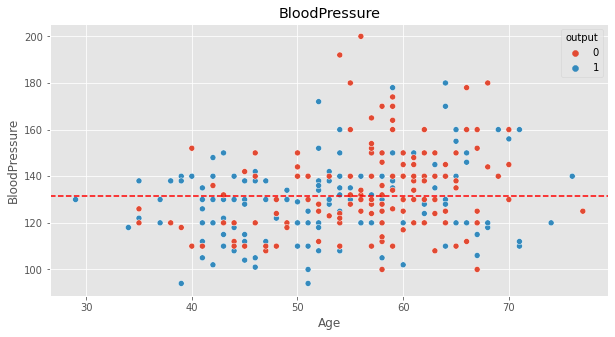

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot( df['age'],df['trtbps'], hue=df['output'])
plt.xlabel("Age",)
plt.ylabel("BloodPressure")
plt.title("BloodPressure")
plt.axhline(df['trtbps'].mean(), linestyle='--', color='red')
plt.grid(True)
plt.style.use("ggplot")


Text(0.5, 1.0, 'Cholestrol with Fasting Blood Sugar')

<Figure size 720x360 with 0 Axes>

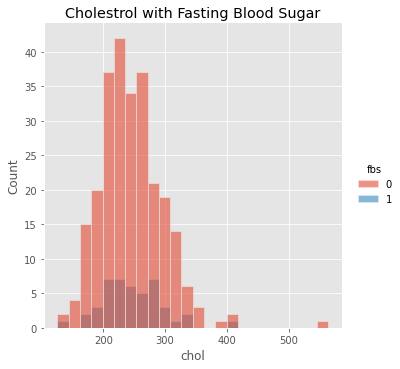

In [67]:
plt.figure(figsize=(10,5))
sns.displot(x='chol',hue='fbs',data=df,alpha=0.6)
plt.title("Cholestrol with Fasting Blood Sugar")

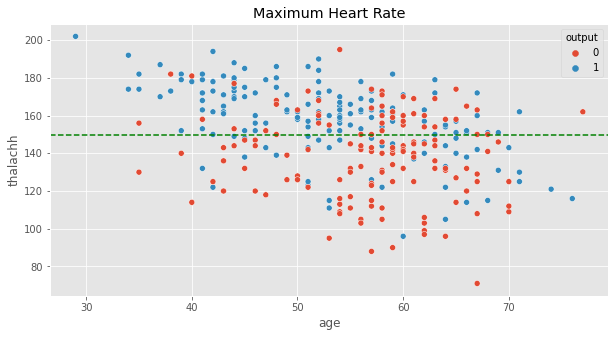

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['age'],df['thalachh'],hue=df['output'])
plt.title("Maximum Heart Rate")
plt.axhline(df['thalachh'].mean(), linestyle='--', color='green')

Text(0.5, 1.0, 'Histogram ')

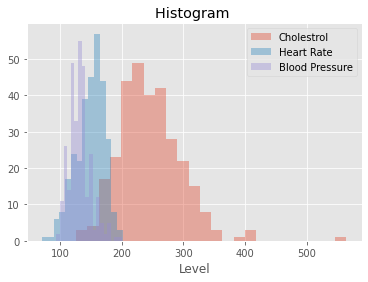

In [69]:
# Histogram
sns.distplot(a=df['chol'], label='Cholestrol', kde=False)
sns.distplot(a=df['thalachh'], label='Heart Rate', kde=False)
sns.distplot(a=df['trtbps'], label='Blood Pressure', kde=False)

plt.legend()
plt.xlabel("Level")
plt.title("Histogram ")

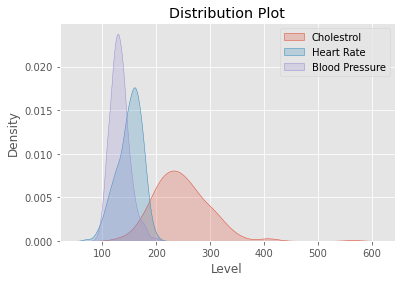

In [70]:
# KDE plots

sns.kdeplot(data=df['chol'], label='Cholestrol', shade=True)
sns.kdeplot(data=df['thalachh'], label='Heart Rate', shade=True)
sns.kdeplot(data=df['trtbps'], label='Blood Pressure', shade=True)
plt.title("Distribution Plot")
plt.xlabel("Level")

plt.legend()

Text(0.5, 1.0, 'Total Column Plot')

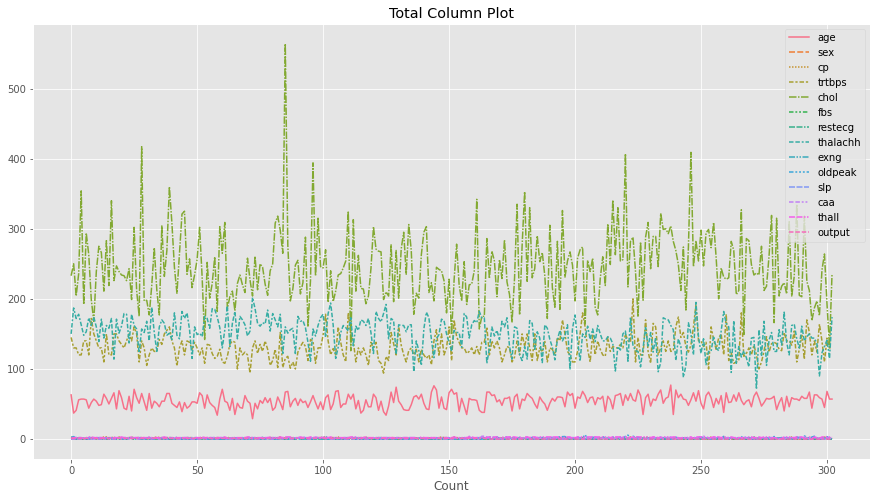

In [71]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df)
plt.xlabel("Count")
plt.title("Total Column Plot")

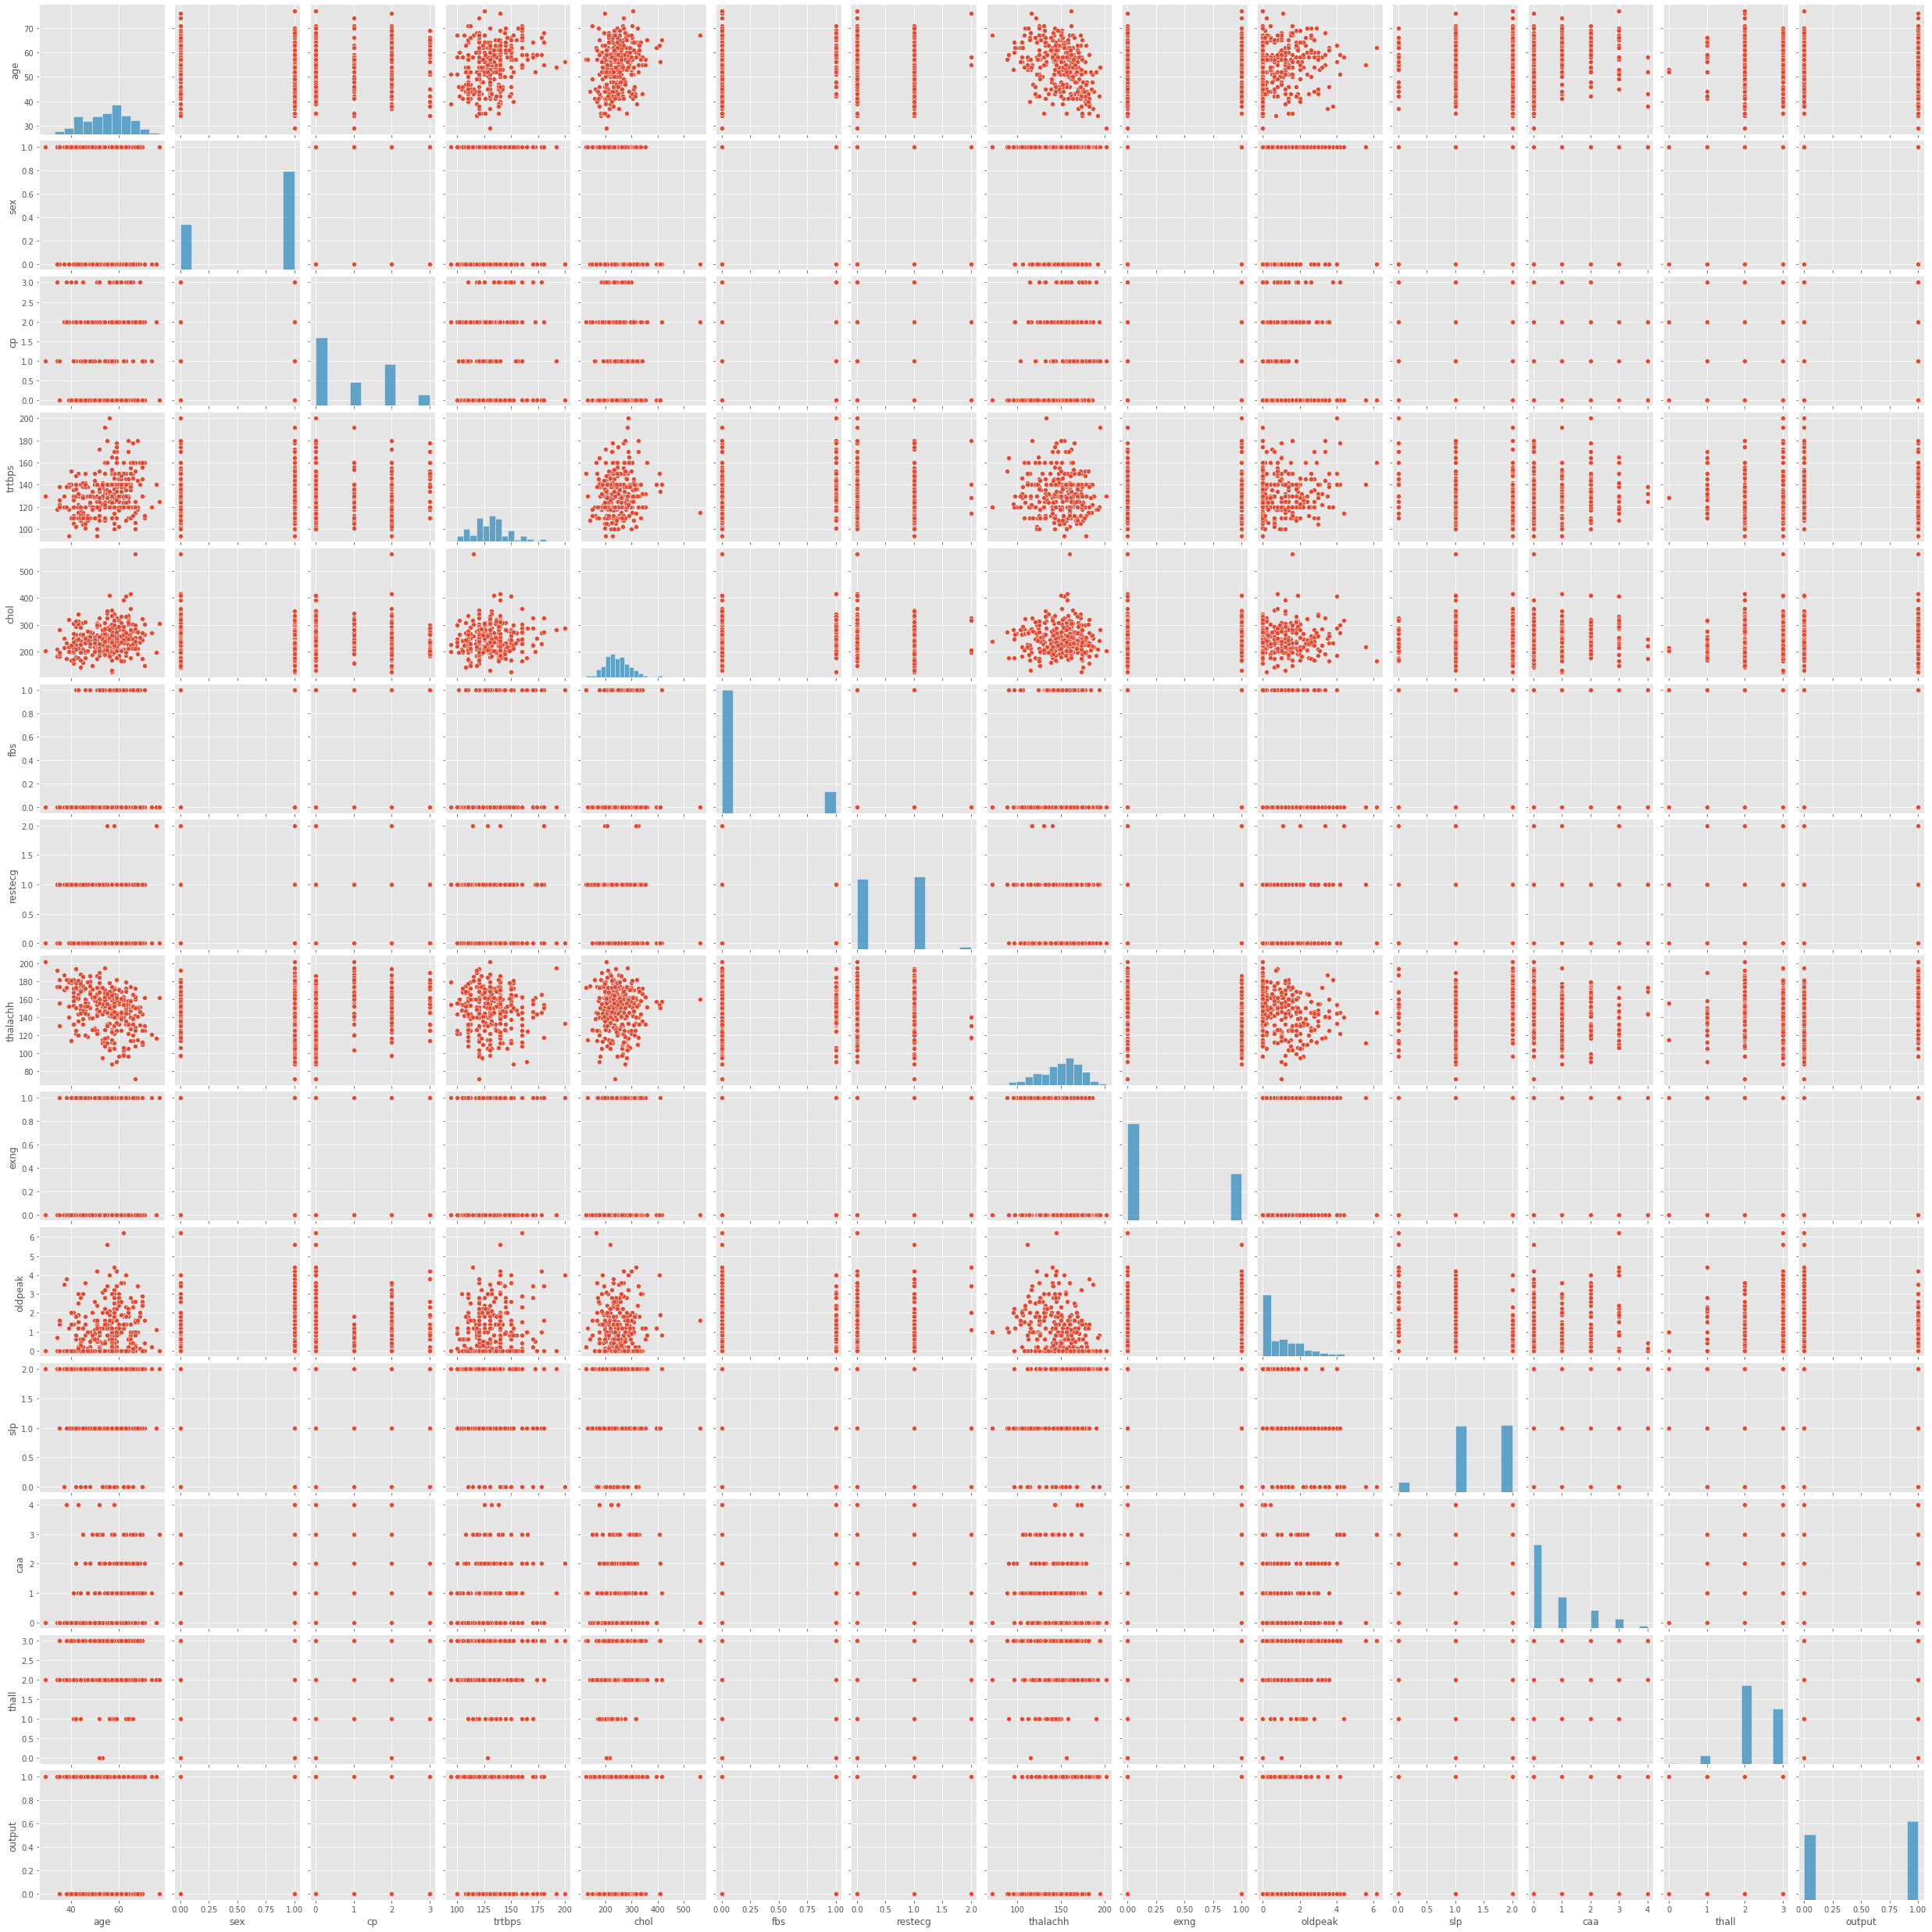

In [72]:
sns.pairplot(data=df)

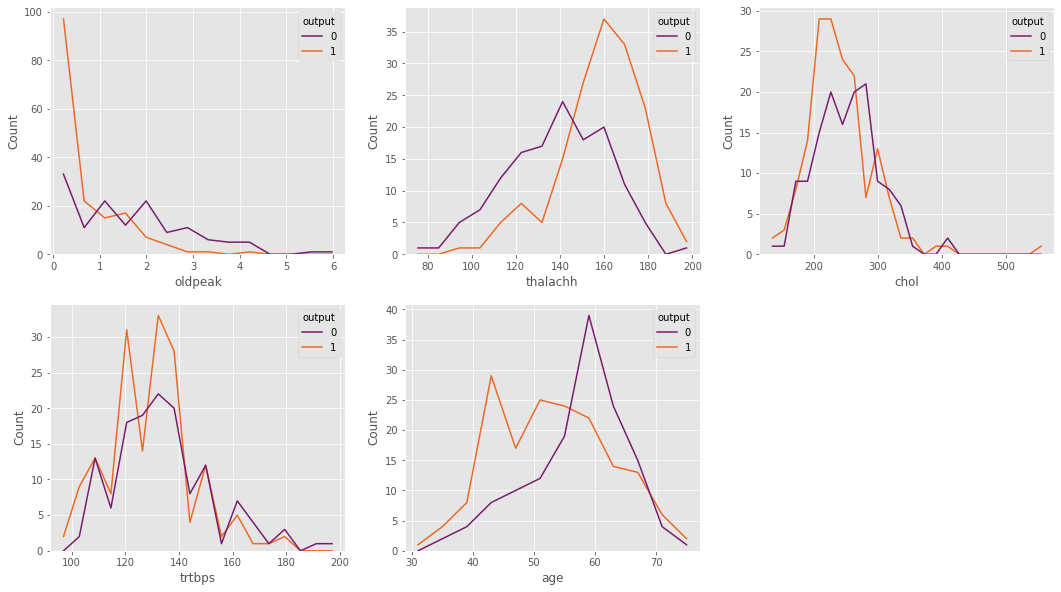

In [73]:
plt.figure(figsize=(18,10))
m=1
for i in continuous:
    plt.subplot(2,3,m)
    sns.histplot(x=df[i],hue=df['output'],kde=False,palette='inferno',fill=False,element='poly') 
    #plt.show()
    m+=1

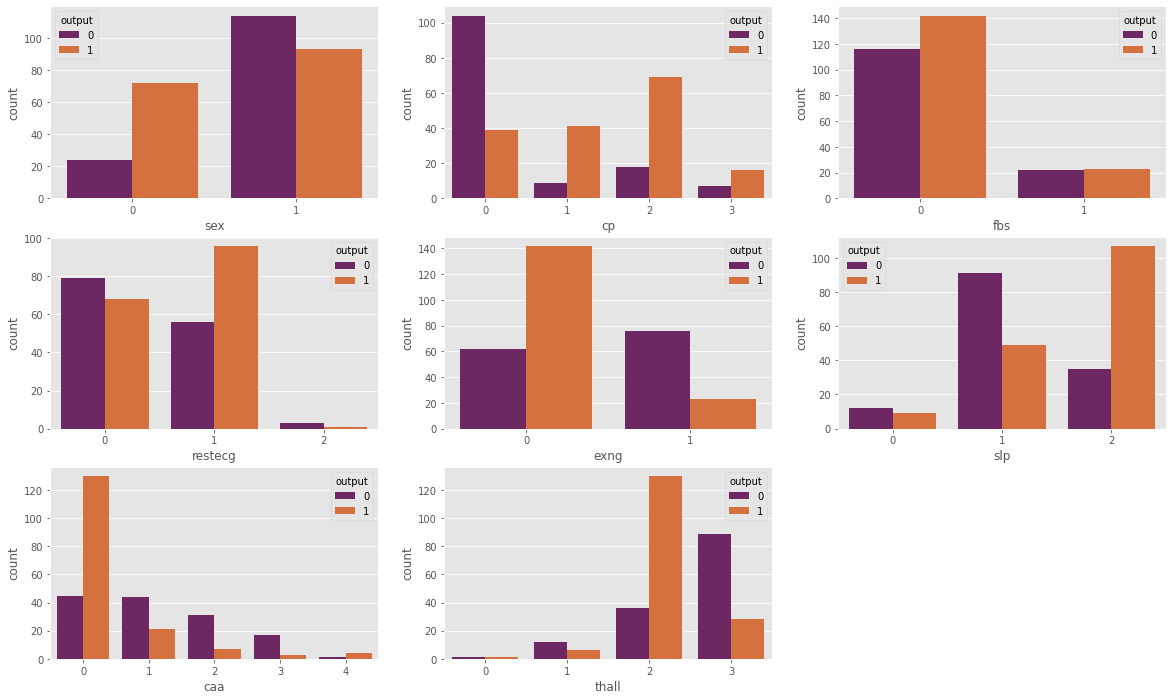

In [74]:
plt.figure(figsize=(20,12))
m=1
for i in discrete:
    plt.subplot(3,3,m)
    sns.countplot(x=df[i],hue=df['output'],palette='inferno',) 
    #plt.show()
    m+=1

In [75]:
px.scatter_3d(df,x='thalachh',y='oldpeak',color='output',z='caa')

# Univariate Analysis

In [76]:
# The numerical columns in the dataset are these
df_num = df[['age','trtbps','chol','thalachh','oldpeak']]
df_cat = df[['sex','exng','caa','cp','fbs','restecg','slp','thall']]

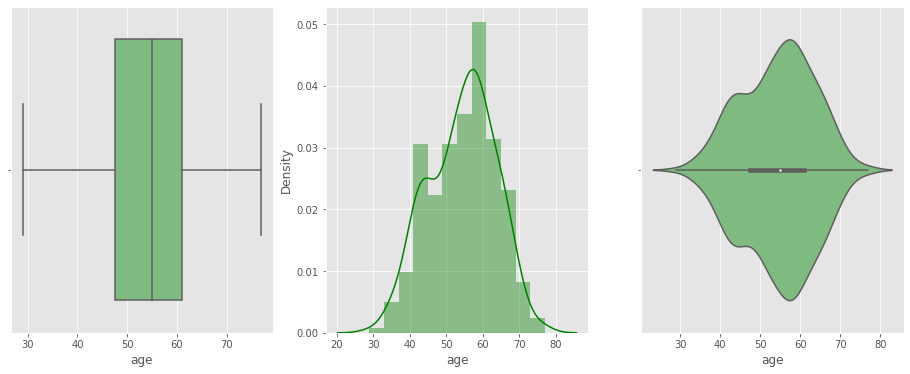

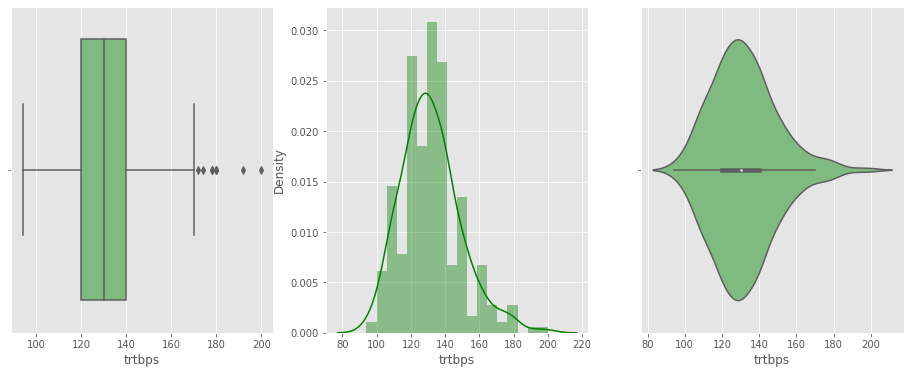

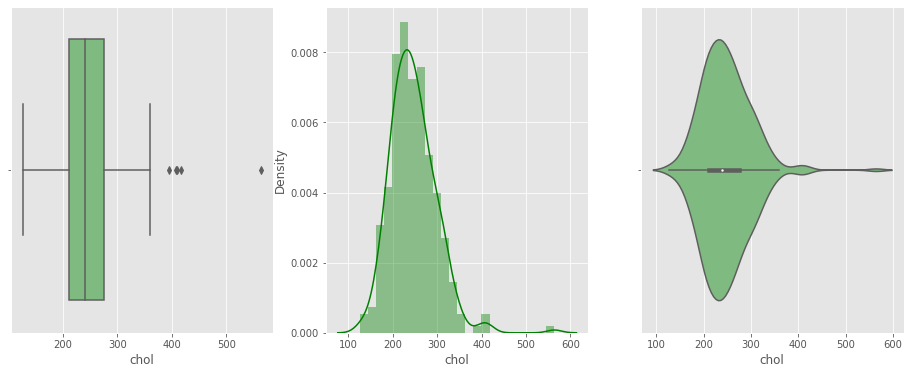

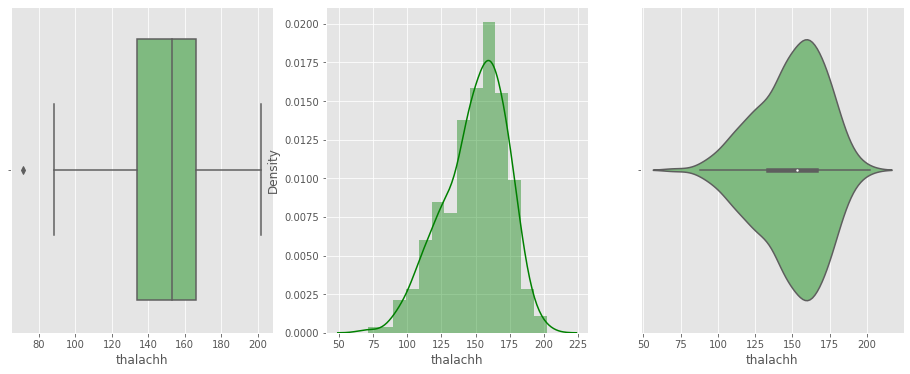

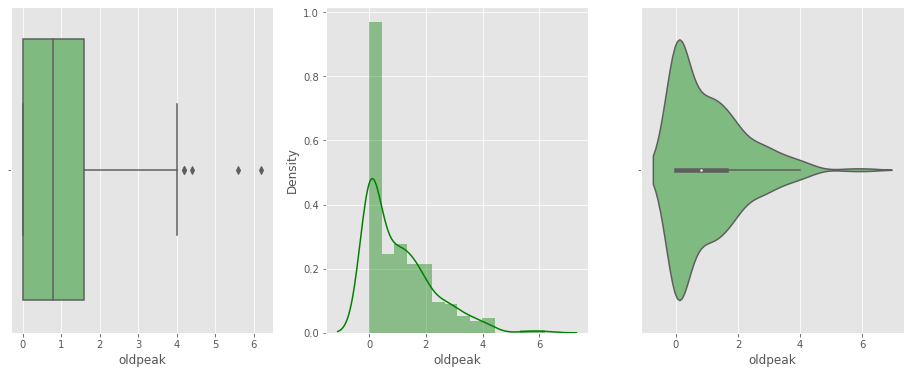

In [77]:
plt.rcParams['figure.figsize']= 16,6
i=1
for col in df_num:
    fig,ax= plt.subplots(1,3)
    sns.boxplot(df_num[col],ax=ax[0],palette='Greens_r')
    sns.distplot(df_num[col],ax=ax[1],color='green')
    sns.violinplot(df_num[col],ax=ax[2],palette='Greens_r')
    i+=1
    plt.show()


 sex :


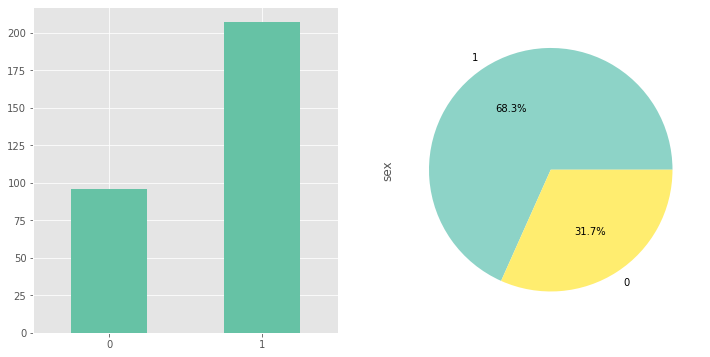


 exng :


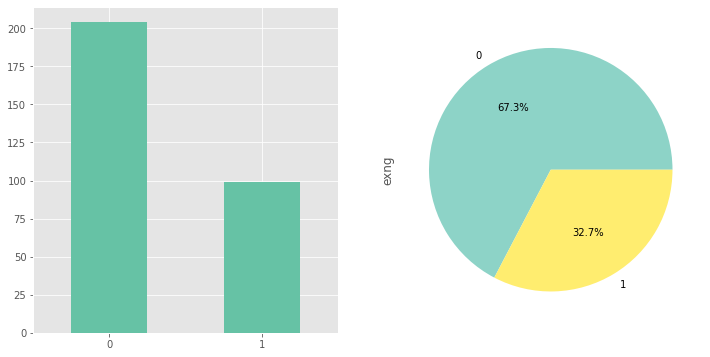


 caa :


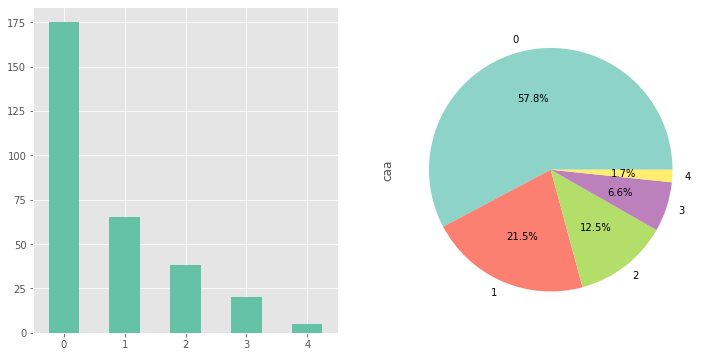


 cp :


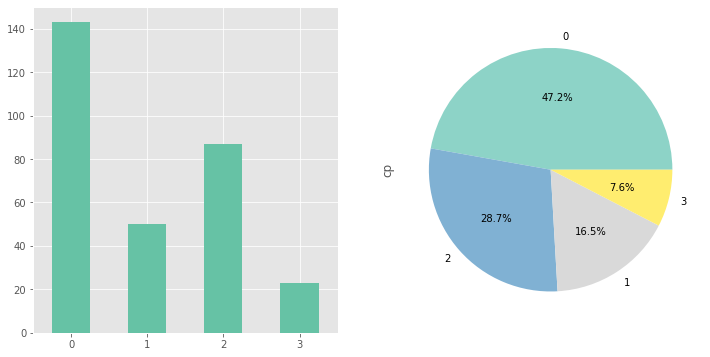


 fbs :


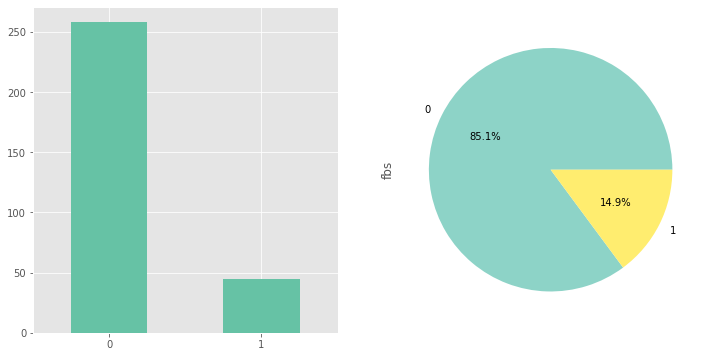


 restecg :


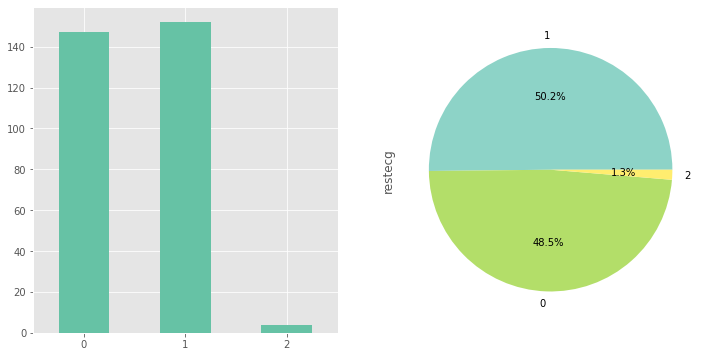


 slp :


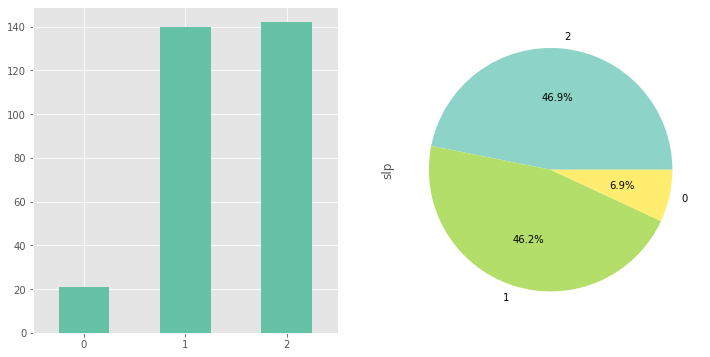


 thall :


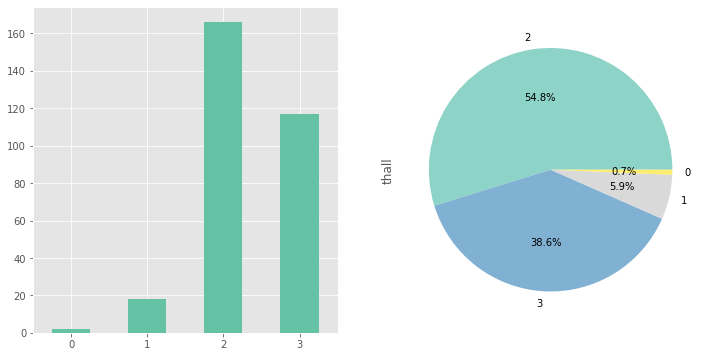

In [78]:
# Univariate analysis of categorical features
plt.rcParams['figure.figsize']= 12,6
for col in df_cat:
    print('\n',col,':')
    fig,ax = plt.subplots(1,2)
    df_cat[col].value_counts().plot(kind='bar',ax=ax[0],rot=0, cmap='Set2')
    df_cat[col].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1], cmap='Set3')
    plt.show()
plt.show()

# Bivariate Analysis

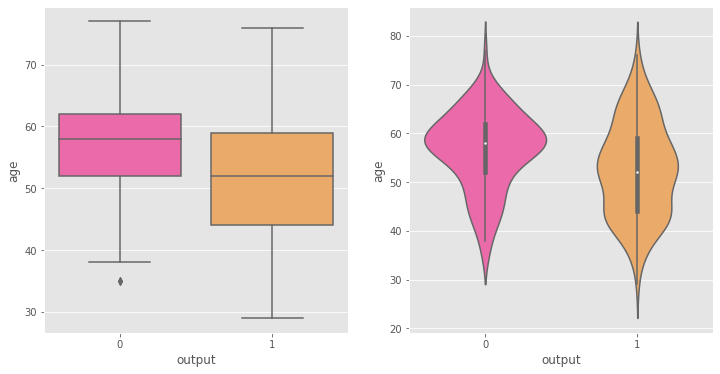

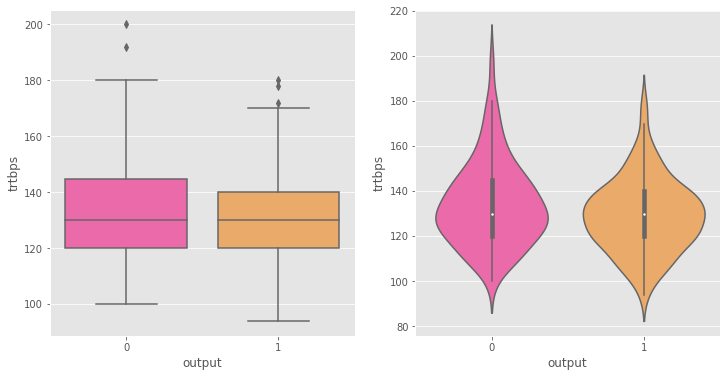

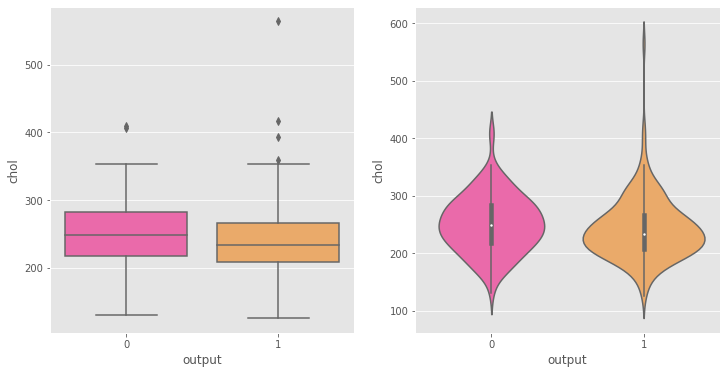

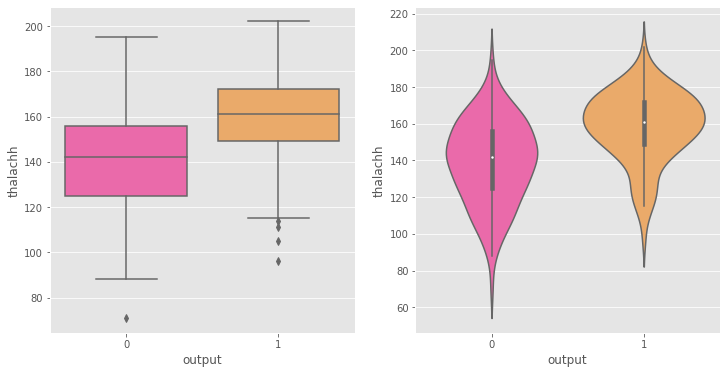

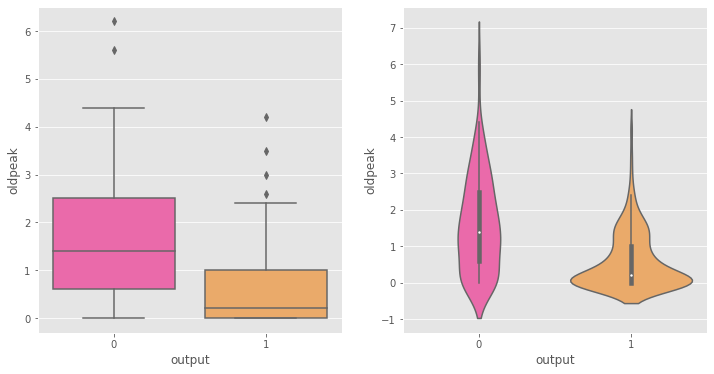

In [79]:
# Numerical columns with output
for col in df_num:
    fig,ax= plt.subplots(1,2)
    sns.boxplot(df['output'], df_num[col],ax=ax[0],palette='spring')
    sns.violinplot(df['output'], df_num[col],ax=ax[1],palette='spring')
    plt.show()

sex Vs output:


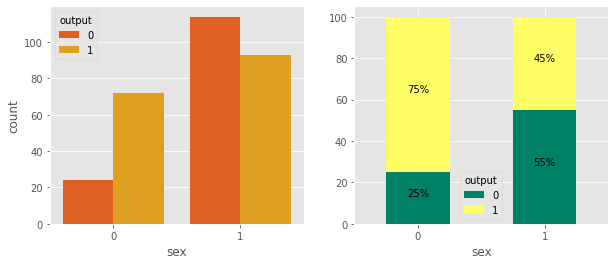

exng Vs output:


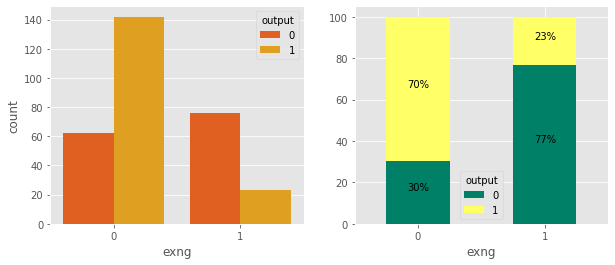

caa Vs output:


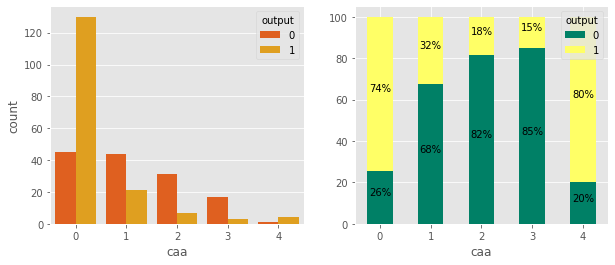

cp Vs output:


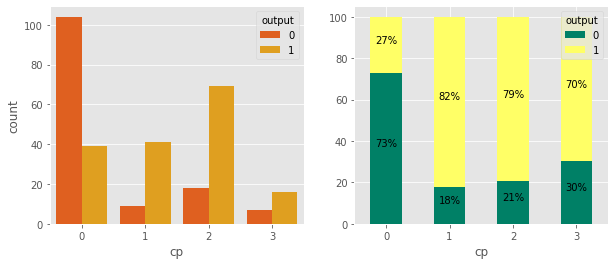

fbs Vs output:


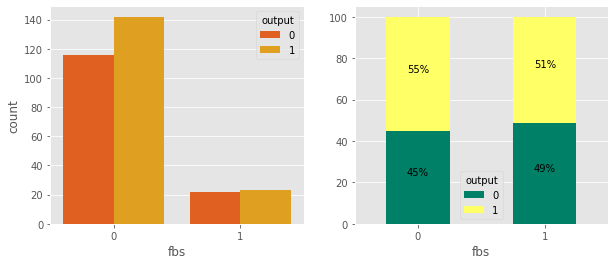

restecg Vs output:


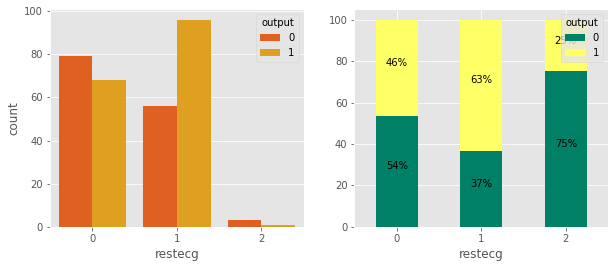

slp Vs output:


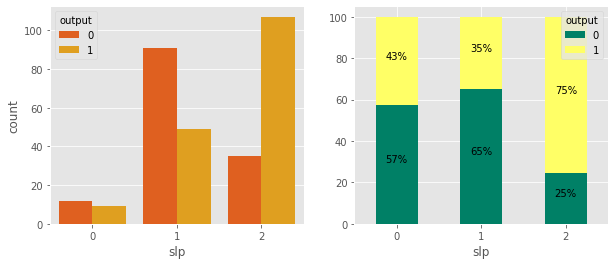

thall Vs output:


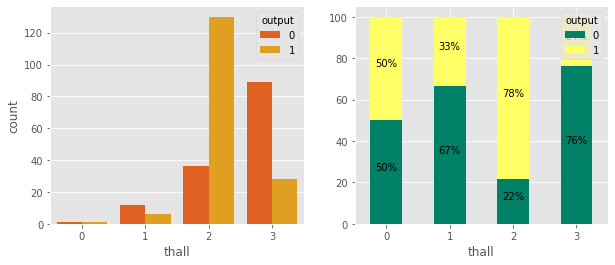

In [80]:
# Categorical columns with Output
plt.rcParams['figure.figsize']= 10,4
for col in df_cat:
    print(col,'Vs','output:')
    fig,ax = plt.subplots(1,2)
    sns.countplot(df_cat[col],hue= df['output'],ax=ax[0],palette='autumn')
    ax_1= pd.crosstab(df_cat[col],df['output']).apply(lambda r: r/r.sum()*100, axis=1).plot(kind='bar',stacked=True,ax=ax[1],rot=0,cmap='summer')
    for rec in ax_1.patches:
        height = rec.get_height()
        ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    plt.show()



# Feature Selection

In [81]:
X = df.drop('output',axis=1)
Y = df['output']

,Scores,Importance (%)
Feature,,
thalachh,188.320472,36.403
oldpeak,72.644253,14.042
caa,66.440765,12.843
cp,62.598098,12.100
exng,38.914377,7.522
chol,23.936394,4.627
age,23.286624,4.501
trtbps,14.823925,2.866
slp,9.804095,1.895


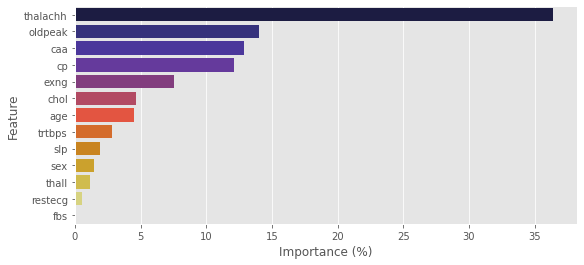

In [82]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='CMRmap')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data

# Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

# Model Selection

In [85]:
from sklearn.metrics import accuracy_score,classification_report

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 


# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

#KNN
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,40):    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,Y_train)
    predK = kn.predict(X_test)
    accuracy.append([accuracy_score(Y_test,predK),i])
    #print('Tested for k =',i)
temp = accuracy[0]
for m in accuracy:
    if temp[0] < m[0]:
        temp=m
knn = KNeighborsClassifier(n_neighbors=temp[1])

#SVM
from sklearn.svm import SVC
svc = SVC()

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

print('Models Imported')

Models Imported


In [86]:
model_acc = []
models = [xgb,lr,rfc,knn,svc,grid]
#model_name = ['xgb','lr','rfc','kno','svc','grid']
for i in models:
    i.fit(X_train,Y_train)
    model_acc.append(accuracy_score(Y_test,i.predict(X_test)))
                      
models = pd.DataFrame({'Models':models,'Accuracy':model_acc})

[19:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf;

[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

In [87]:
models = models.sort_values(by=['Accuracy'],ascending=False).reset_index().drop('index',axis=1)
best = models['Models'][0]
models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
models

,Models,Accuracy
0,KNeighborsClassifier,0.918033
1,RandomForestClassifier,0.885246
2,SVC,0.852459
3,LogisticRegression,0.819672
4,GridSearchCV,0.819672
5,XGBClassifier,0.803279


In [88]:
print('Hence the best model is',models['Models'][0],'with an accuracy of',round((models['Accuracy'][0]*100),2),'%')
print('\nThe classification report is:')
print(classification_report(Y_test,best.predict(X_test)))

Hence the best model is KNeighborsClassifier with an accuracy of 91.8 %

The classification report is:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.96      0.86      0.91        28

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



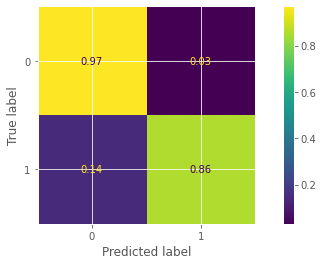

In [89]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best,X_test, Y_test,normalize= 'true',cmap='viridis')